In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings( "ignore", module = "seaborn\..*")

In [2]:
df = pd.read_csv('../datasets/dropna_df.csv')

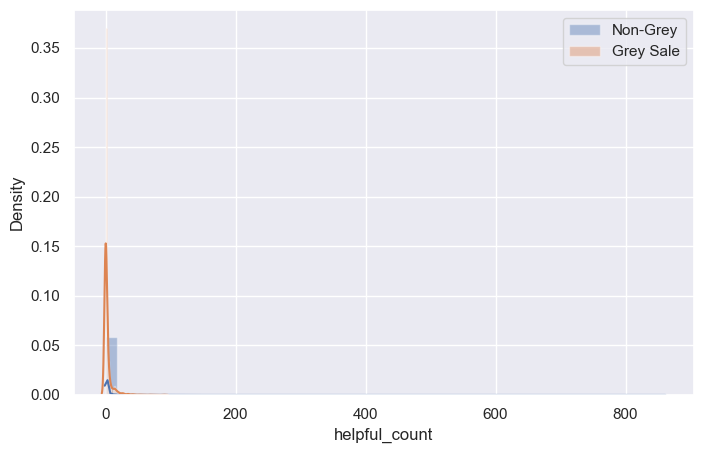

In [3]:
plt.figure(figsize = (8, 5))
sns.distplot(df[df['grey_sale'] == 0]['helpful_count'], label = 'Non-Grey')
sns.distplot(df[df['grey_sale'] == 1]['helpful_count'], label = 'Grey Sale')
plt.legend();

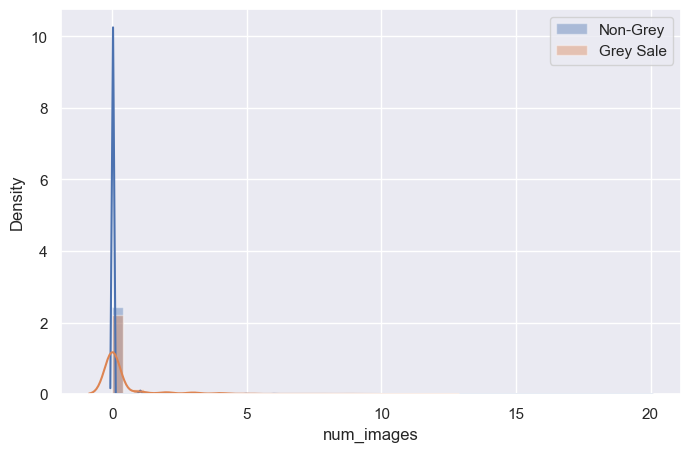

In [4]:
plt.figure(figsize = (8, 5))
sns.distplot(df[df['grey_sale'] == 0]['num_images'], label = 'Non-Grey')
sns.distplot(df[df['grey_sale'] == 1]['num_images'], label = 'Grey Sale')
plt.legend();

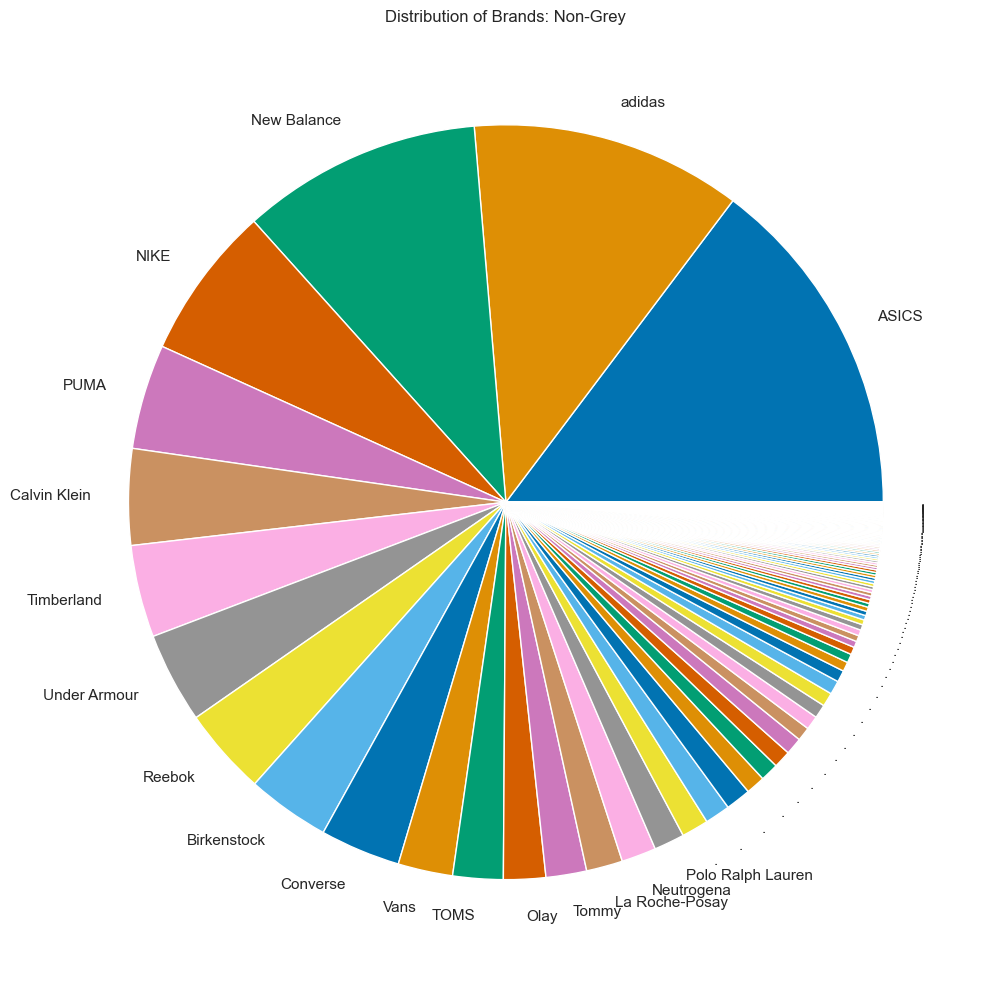

In [5]:
plt.figure(figsize = (12, 10))

plt.pie(df[df['grey_sale'] == 0]['brand'].value_counts(),
        labels = [df[df['grey_sale'] == 0]['brand'].value_counts().index[i] if i < 18
                  else '.' for i in range(len(df[df['grey_sale'] == 0]['brand'].value_counts().index))],
       colors = sns.color_palette('colorblind'))
plt.title('Distribution of Brands: Non-Grey')
plt.tight_layout()
plt.savefig('../assets/brand_pie_nongrey.png')

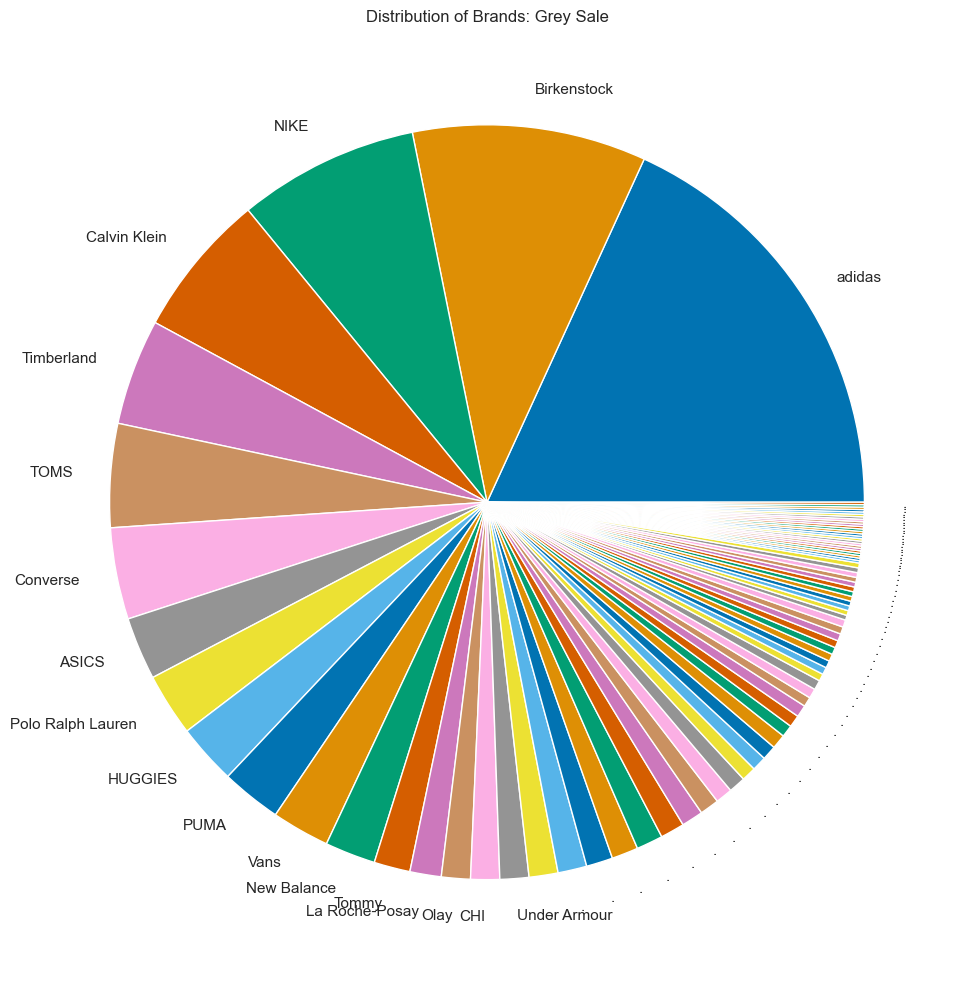

In [6]:
plt.figure(figsize = (12, 10))
plt.pie(df[df['grey_sale'] == 1]['brand'].value_counts(),
       labels = [df[df['grey_sale'] == 1]['brand'].value_counts().index[i] if i < 18
                 else '.' for i in range(len(df[df['grey_sale'] == 1]['brand'].value_counts().index))],
       colors = sns.color_palette('colorblind'))
plt.title('Distribution of Brands: Grey Sale')
plt.tight_layout()
plt.savefig('../assets/brands_pie_grey.png')

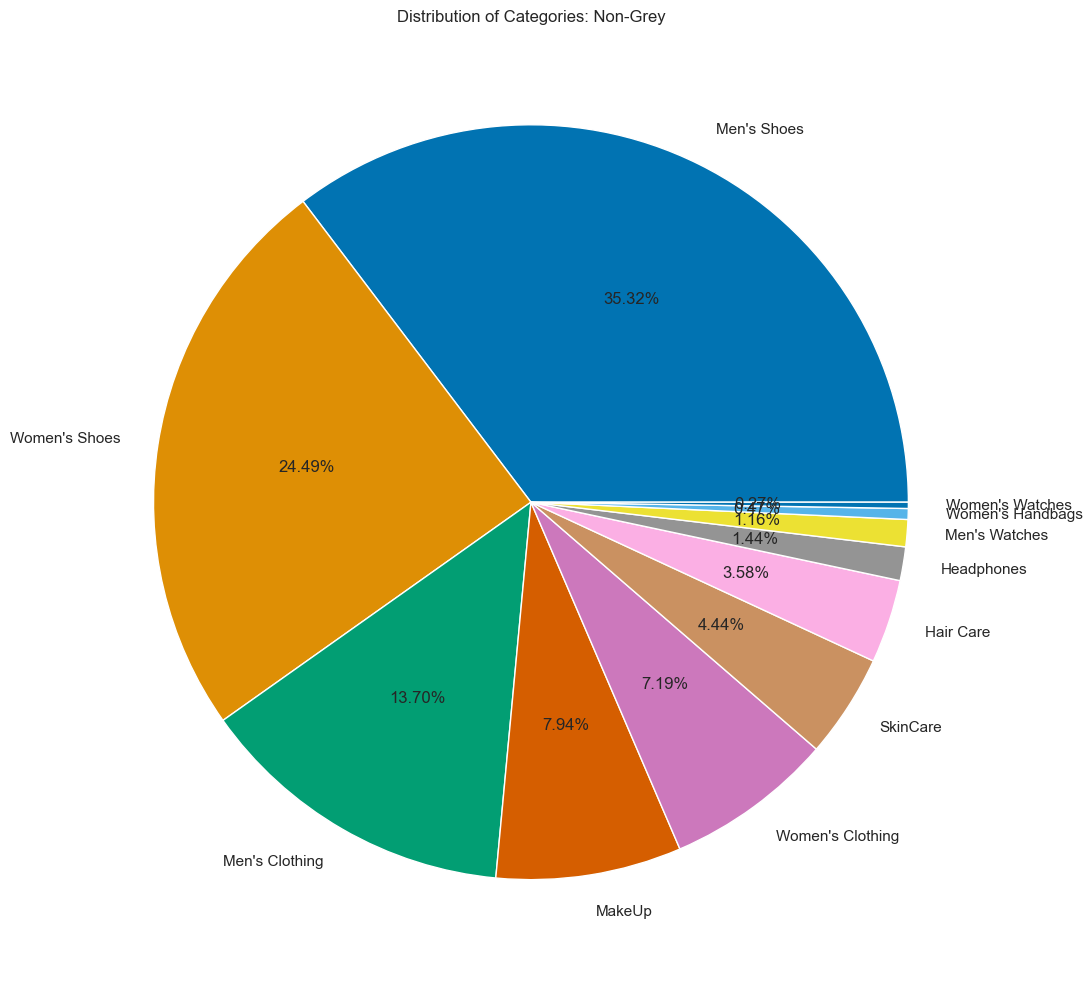

In [7]:
plt.figure(figsize = (12, 10))

plt.pie(df[df['grey_sale'] == 0]['category'].value_counts(),
        labels = [df[df['grey_sale'] == 0]['category'].value_counts().index[i] for i in range(len(df[df['grey_sale'] == 0]['category'].value_counts().index))],
        autopct = '%.2f%%', colors = sns.color_palette('colorblind'))
plt.title('Distribution of Categories: Non-Grey')
plt.tight_layout()
plt.savefig('../assets/category_pie_nongrey.png')

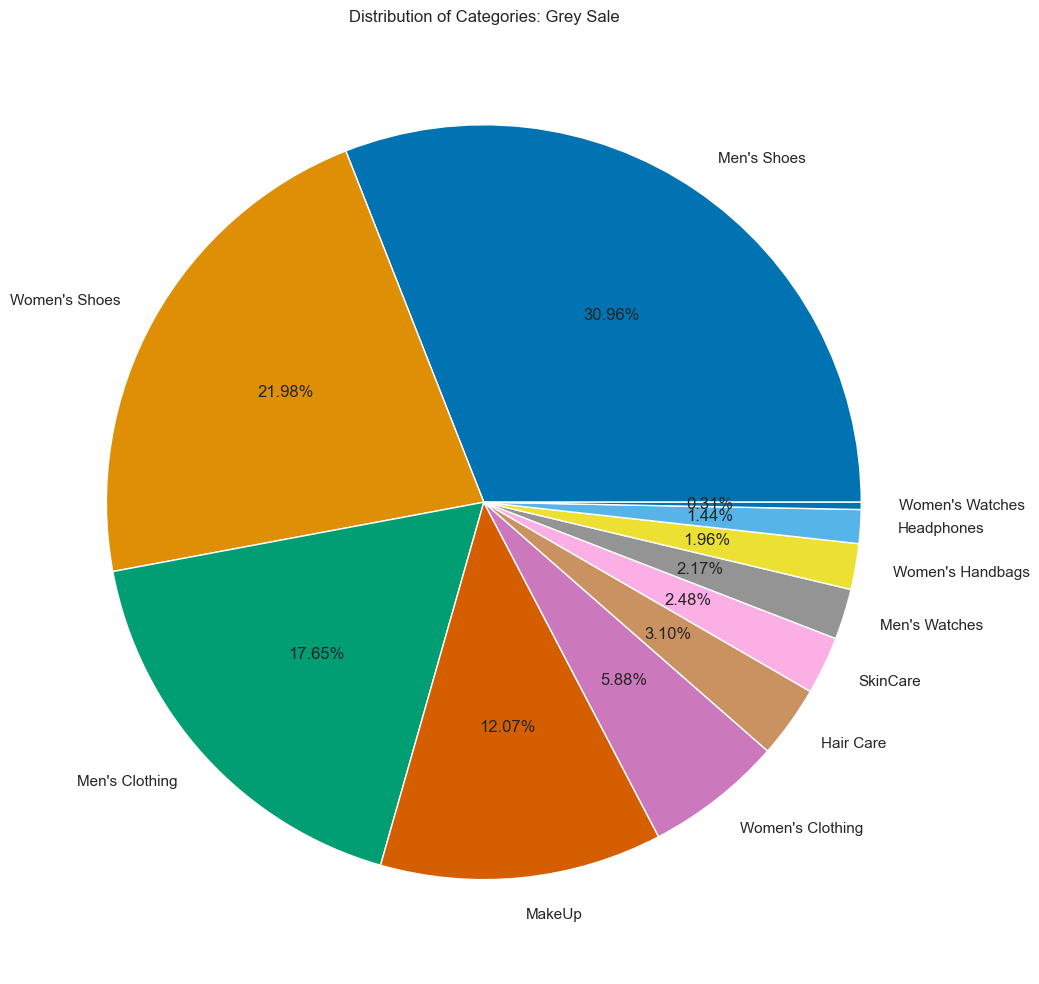

In [8]:
plt.figure(figsize = (12, 10))
plt.pie(df[df['grey_sale'] == 1]['category'].value_counts(),
        labels = [df[df['grey_sale'] == 1]['category'].value_counts().index[i] for i in range(len(df[df['grey_sale'] == 1]['category'].value_counts().index))],
        autopct = '%.2f%%', colors = sns.color_palette('colorblind'))
plt.title('Distribution of Categories: Grey Sale')
plt.tight_layout()
plt.savefig('../assets/category_pie_grey.png')

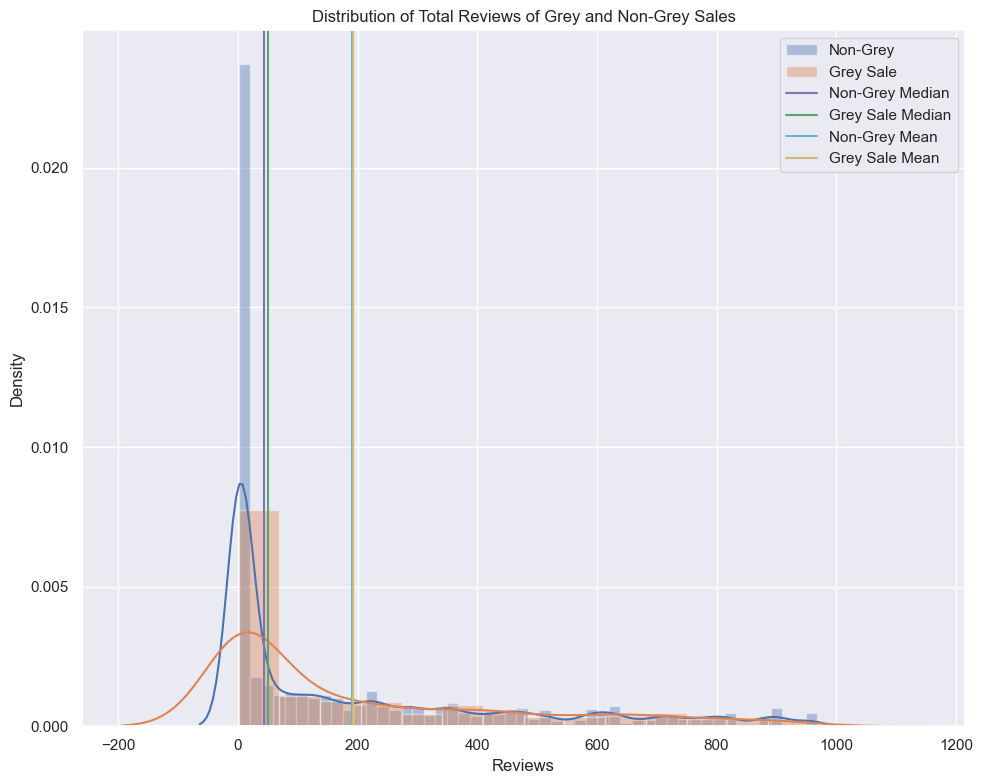

In [9]:
# investigate distribution of ['grey_sale'] amongst missing/non-missing values
plt.figure(figsize = (10, 8))
sns.distplot(df[df['grey_sale'] == 0]['num_reviews'], label = 'Non-Grey')
sns.distplot(df[df['grey_sale'] == 1]['num_reviews'], label = 'Grey Sale')
plt.axvline(df[df['grey_sale'] == 0][['num_reviews']].dropna().astype(int).median().values[0], label = 'Non-Grey Median', color = 'm')
plt.axvline(df[df['grey_sale'] == 1][['num_reviews']].dropna().astype(int).median().values[0], label = 'Grey Sale Median', color = 'g')
plt.axvline(df[df['grey_sale'] == 0][['num_reviews']].dropna().astype(int).mean().values[0], label = 'Non-Grey Mean', color = 'c')
plt.axvline(df[df['grey_sale'] == 1][['num_reviews']].dropna().astype(int).mean().values[0], label = 'Grey Sale Mean', color = 'y')

plt.title('Distribution of Total Reviews of Grey and Non-Grey Sales')


plt.legend()
plt.xlabel('Reviews')
plt.tight_layout()
plt.savefig('../assets/review_dist_grey.png')

# (table with means and stdevs)

# doesn't seem to **distinguish** between classes

In [10]:
print(df[df['grey_sale'] == 0][['num_reviews']].dropna().astype(int).describe())

print(df[df['grey_sale'] == 1][['num_reviews']].dropna().astype(int).describe())

         num_reviews
count  254505.000000
mean      190.972574
std       260.908345
min         1.000000
25%         2.000000
50%        44.000000
75%       307.000000
max       968.000000
       num_reviews
count   969.000000
mean    192.859649
std     256.653300
min       1.000000
25%       2.000000
50%      50.000000
75%     340.000000
max     954.000000


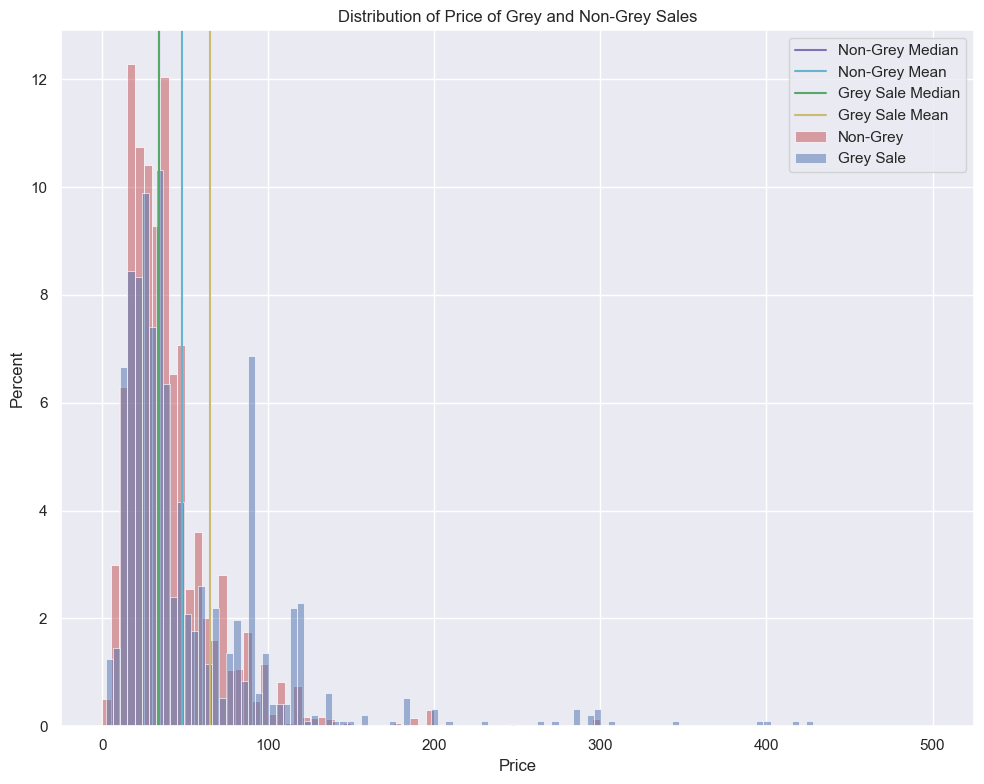

In [11]:
# investigate distribution of ['grey_sale'] amongst missing/non-missing values
plt.figure(figsize = (10, 8))
sns.histplot(df[(df['grey_sale'] == 0) & (df['price_low'] < 500)]['price_low'], label = 'Non-Grey', bins = 100, color = 'r', alpha = 0.5, stat = 'percent')
sns.histplot(df[(df['grey_sale'] == 1) & (df['price_low'] < 500)]['price_low'], label = 'Grey Sale', bins = 100, alpha = 0.5, stat = 'percent')
plt.axvline(df[(df['grey_sale'] == 0)][['price_low']].dropna().astype(int).median().values[0], label = 'Non-Grey Median', color = 'm')
plt.axvline(df[(df['grey_sale'] == 0)][['price_low']].dropna().astype(int).mean().values[0], label = 'Non-Grey Mean', color = 'c')
plt.axvline(df[(df['grey_sale'] == 1)][['price_low']].dropna().astype(int).median().values[0], label = 'Grey Sale Median', color = 'g')
plt.axvline(df[(df['grey_sale'] == 1)][['price_low']].dropna().astype(int).mean().values[0], label = 'Grey Sale Mean', color = 'y')

plt.title('Distribution of Price of Grey and Non-Grey Sales')


plt.legend()
plt.xlabel('Price')
plt.tight_layout()
plt.savefig('../assets/prices_dist_grey.png')

# doesn't seem to **distinguish** between classes

2799.88


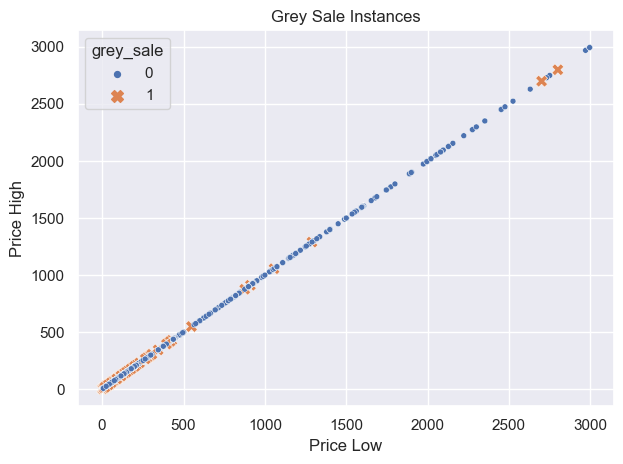

In [12]:
print(max(df[df['grey_sale'] == 1]['price_low']))

df_under_3k = df[df['price_low'] < 3_000]

sns.scatterplot(data = df_under_3k, x ='price_low', y = 'price_high', hue = 'grey_sale', style = 'grey_sale', size = 'grey_sale', size_order = [1, 0])
#plt.axline(xy1 = (0, 0), slope = 1, color = 'r');
plt.xlabel('Price Low')
plt.ylabel('Price High')
plt.title('Grey Sale Instances')
plt.tight_layout()
plt.savefig('../assets/price_instances.png')